Problem Definition: The task is to predict the day price direction of Amazon.com, Inc. (AMZN) stock.

The stock market is very complex and highly volatile. In order to be profitable, we do not need to predict the correct price, but rather, the price direction: whether it will be higher or lower than the price that is today. If we predict it to be higher, we might as well buy some stocks, else, we should probably sell.

Therefore, the target would be a binary classification whether the next day closing price will be higher than the opening price.

In [9]:
#importing necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Explore Data

In [10]:
df = pd.read_csv('AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-15,101.070000,101.144997,100.077499,101.049500,101.049500,59626000
1,2019-07-16,100.528999,101.316002,100.060997,100.495003,100.495003,52364000
2,2019-07-17,100.352501,100.599998,99.601501,99.601501,99.601501,51176000
3,2019-07-18,99.000504,99.375000,97.577499,98.894997,98.894997,69738000
4,2019-07-19,99.560501,99.800003,98.111504,98.225998,98.225998,63712000


In [11]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


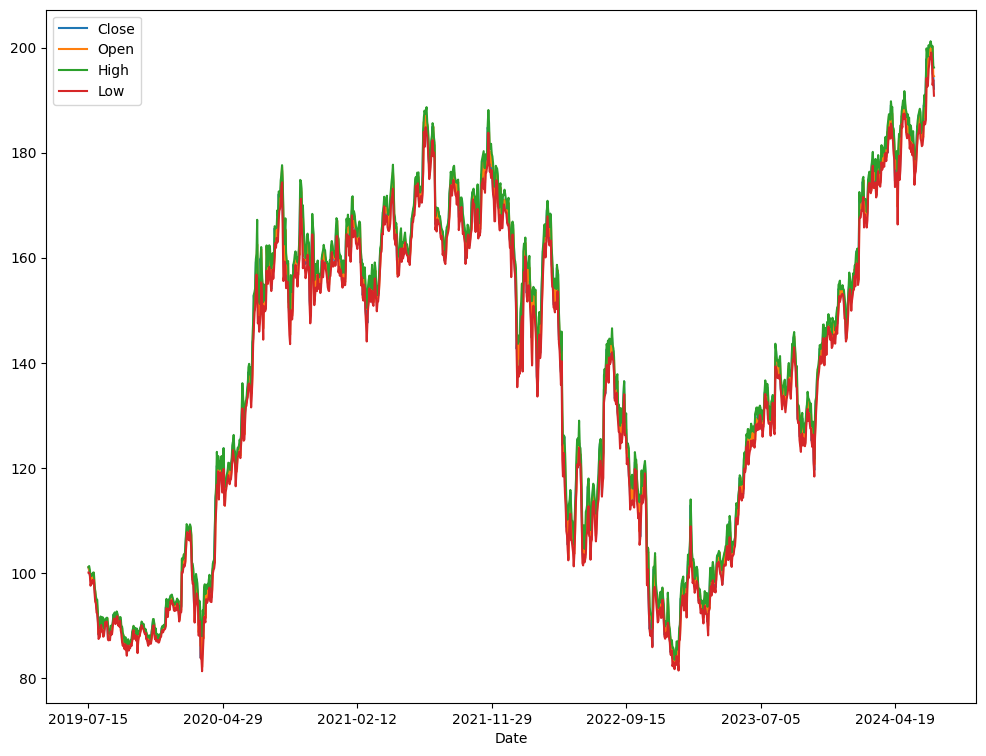

In [13]:
plt.rcParams["figure.figsize"] = (12, 9)
_ = df.plot(x="Date", y=["Close", "Open", "High", "Low"])

### Data preprocessing

As the `Date` column is object type and ML cannot handle it, I will preprocess this column

In [14]:
import datetime
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df = df.drop(columns=['Date'])

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,101.070000,101.144997,100.077499,101.049500,101.049500,59626000,2019,7,15
1,100.528999,101.316002,100.060997,100.495003,100.495003,52364000,2019,7,16
2,100.352501,100.599998,99.601501,99.601501,99.601501,51176000,2019,7,17
3,99.000504,99.375000,97.577499,98.894997,98.894997,69738000,2019,7,18
4,99.560501,99.800003,98.111504,98.225998,98.225998,63712000,2019,7,19


### Feature Engineering

As I am trying to pedict whether I should buy or sell my stock considering next day's price, I need to crete a my `Target variable` 

In [17]:
# 'shift(-1)' this shifts the closing prices up by one period, so each value represents the closing price of the next day.
df["Target"] = (df["Close"].shift(-1) > df["Open"]).astype(int)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,year,month,day,Target
0,101.070000,101.144997,100.077499,101.049500,101.049500,59626000,2019,7,15,0
1,100.528999,101.316002,100.060997,100.495003,100.495003,52364000,2019,7,16,0
2,100.352501,100.599998,99.601501,99.601501,99.601501,51176000,2019,7,17,0
3,99.000504,99.375000,97.577499,98.894997,98.894997,69738000,2019,7,18,0
4,99.560501,99.800003,98.111504,98.225998,98.225998,63712000,2019,7,19,0
5,98.556999,99.449997,97.913002,99.281502,99.281502,58000000,2019,7,22,1
6,99.799500,99.889503,98.656502,99.724503,99.724503,54070000,2019,7,23,1
7,98.464996,100.065002,98.293503,100.040497,100.040497,52626000,2019,7,24,1
8,100.050003,100.059998,98.636002,98.691002,98.691002,82730000,2019,7,25,0
9,97.099998,97.544998,96.225502,97.152496,97.152496,98542000,2019,7,26,0


In [19]:
df.to_csv('preprocessed_data.csv',index=False)